<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT421/blob/main/herrera_module_C.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **MODULE C:** Interpolation: Part 2
# **AUTHOR:** Benjamin Joseph L. Herrera
# **CLASS:** MAT 421
# **DATE:** 28 JAN 2024

## ⚠️ Run these commandes prior to running anything

In [1]:
!pip install scipy
!pip install matplotlib

## Lagrange Polynomial Interpolation

This method of interpolation focuses on using a **single** polynomial rather than a series of piecewises polynomials that pass through all given points. A **langrange polynomial** $L(X)$ is defined as:

$$L(x) = \sum^{n}_{i = 1} y_i P_i(x)$$

where $P_i(x)$ is a combination of **Lagrange basis polynomials** defined as:

$$P_i(x) = \prod_{j=1, j \neq i}^{n} \frac{x-x_i}{x_i - x_j}$$

A property of the Langrange basis polynomial is that when $i$ is the same as $j$, $P_i(x) = 1$. When these value are different $P_i(x) = 0$. This allows us to get a direct interpolation of $x$ when passed into a lagrange polynomial ($L(x_i) = y_i$).


For brevity purposes, we will use the example from the previous part, but we will prune the cardinality of the $X$ and $Y$ sets to four elements:

$$X = \{10, 20, 30, 40\}$$

$$Y = \{42, 56, 88, 86\}$$

With this set of values, the basis polynomials times their ground truth y values are:

$$y_1P_1 = -0.007x^3+0.63x^2-18.2^x+168 $$

$$y_2P_2 = 0.028x^3-2.24x^2+53.2x-336$$

$$y_3P_3 = -0.044x^3+3.08x^2-61.6x+352$$

$$y_4P_4 = 0.01433333x^3-0.86x^2+15.76666667x-86

This leads us to a $L(x)$ of:

$$L(x) = -0.00866667x^3+0.61x^2-10.83333333x+98$$

This means that $L(15) = 43.4999888$. Let's try to visualize the polynomials:

In [2]:
# Imports
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Set plot theme
plt.style.use('classic')

In [3]:
# X and Y sets with polynomial coeffiicients
X = [10, 20, 30, 40]
Y = [42, 56,88, 86]
y1P1_coeff = [168, -18.2, 0.63, -0.007]
y2P2_coeff = [-336, 53.2, -2.24, 0.028]
y3P3_coeff = [352, -61.6, 3.08, -0.044]
y4P4_coeff = [-86, 15.76667, -0.86, 0.014333]

# Create Polynomial basis functions
P1 = poly.Polynomial(y1P1_coeff)
P2 = poly.Polynomial(y2P2_coeff)
P3 = poly.Polynomial(y3P3_coeff)
P4 = poly.Polynomial(y4P4_coeff)

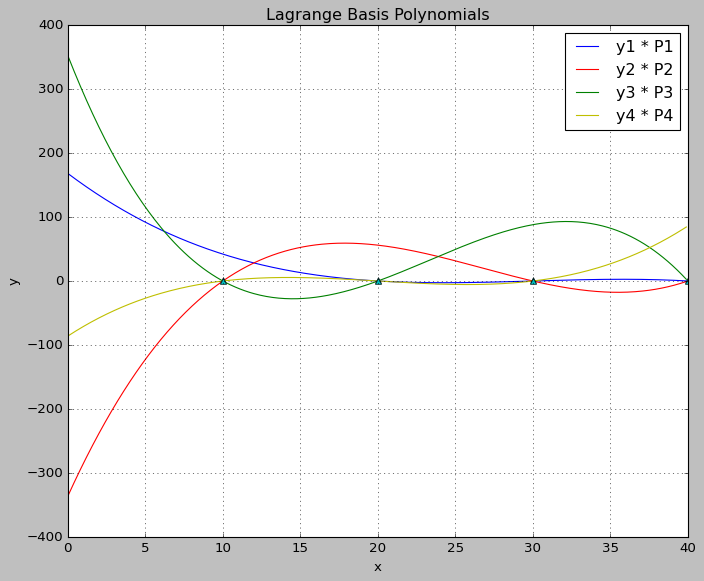

In [4]:
# Set up the plot
x_ = np.arange(0, 40, 0.1)
fig = plt.figure(figsize = (10,8))

plt.plot(x_, P1(x_), 'b', label = 'y1 * P1')
plt.plot(x_, P2(x_), 'r', label = 'y2 * P2')
plt.plot(x_, P3(x_), 'g', label = 'y3 * P3')
plt.plot(x_, P4(x_), 'y', label = 'y4 * P4')

# Print the plot
plt.plot(X, np.ones(len(X)), 'c^', X, np.zeros(len(X)), 'c^')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Now let's visualize them together into a Lagrange polynomial and $L(15)$ highlighted in a red dot:

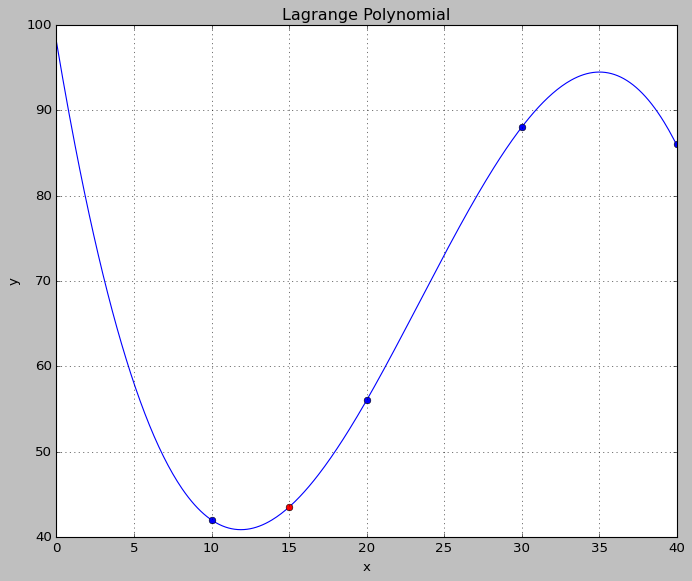

In [5]:
# Define the lagrange polynomials
L = P1 + P2 + P3 + P4

# Plot the graph
fig = plt.figure(figsize = (10,8))
plt.plot(x_, L(x_), 'b', X, Y, 'bo')
plt.title('Lagrange Polynomial')
plt.plot(15, L(15), 'ro')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Additionally, sci-py can also do the polynominal calculations for us instead of calculating it ourselves:

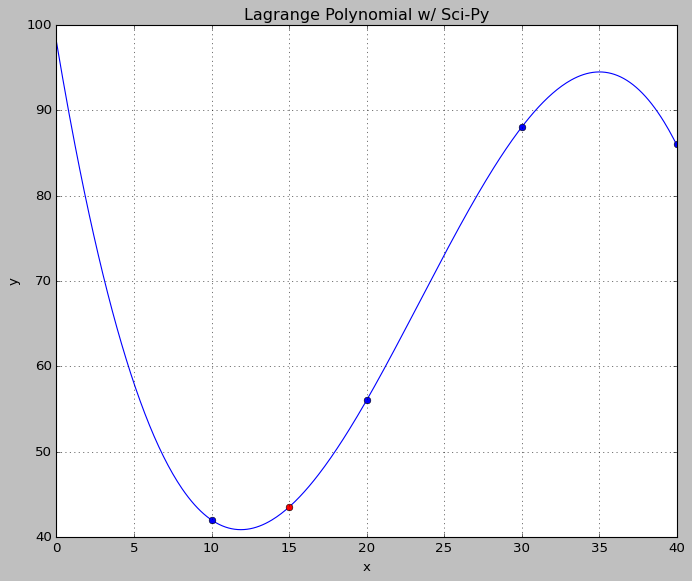

In [6]:
# Import the lagrange library
from scipy.interpolate import lagrange

# Calculate the lagrange function
f_lagrange = lagrange(X, Y)

# Plot the graph
fig = plt.figure(figsize = (10,8))
plt.plot(x_, f_lagrange(x_), 'b', X, Y, 'bo')
plt.plot(15, f_lagrange(15), 'ro')
plt.title('Lagrange Polynomial w/ Sci-Py')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using the untrimmed version of the $X$ and $Y$ sets from the previous module, we can get this graph (Values of the original $X$ and $Y$ provided below as well).

$$X = \{10, 20, 30, 40, 50, 60, 70, 80, 90, 100\}$$

$$Y = \{42, 56, 88, 86, 9, 10, 21, 451, 96, 11\}$$

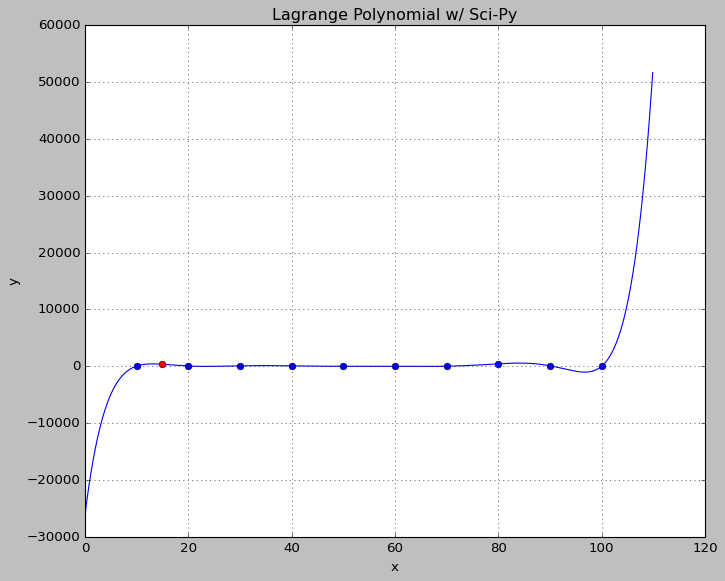

360.6302032470485


In [7]:
# Define original X and Y values
X = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Y = [42, 56, 88, 86, 9, 10, 21, 451, 96, 11]

# Calculate the lagrange function
f_lagrange = lagrange(X, Y)

# Plot the graph
x_ = np.arange(0, 110, 0.1)
fig = plt.figure(figsize = (10,8))
plt.plot(x_, f_lagrange(x_), 'b', X, Y, 'bo')
plt.plot(15, f_lagrange(15), 'ro')
plt.title('Lagrange Polynomial w/ Sci-Py')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print L(15)
print(f_lagrange(15))

Here, you can see the graph with the original values. Additionally, you can see that $L(15) = 360.6302032470485$

There's a caveat in using lagrange interpolation. The polynomials are defined within the range of $[x_1, x_n]$. This means that $x$ values outside this range, will not yield accurate interpolations.

## Newton’s Polynomial Interpolation

Another method in interpolation is Newton's polynomial interpolation. This is defined through the following definition:

$$f(x) = \sum^n_{i=0} a_i n_i(x)$$

where

$$n_i(x) = \prod^{i-1}_{j=0}x-x_j$$

Unlike the other methods, the coeffecients $a_i$ can be calculated via divided differences. We define this feature as followed:

$$a_k = f[x_k, x_{k-1}, \dots, x_1, x_0] = \frac{f[x_k, x_{k-1}, \dots, x_1, x_0] - f[x_{k-1}, x_{k-2}, \dots, x_1, x_0]}{x_k - x_0}

where $k \neq 0 $ and where $a_0 = f(x_0) = y_0$.

Let's see how this unfolds. To calculate the value of $a_1$ we do the following:

$$a_1 = f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}$$

When we calculate $a_2$, we do the following:

$$a_2 = f[x_2, x_1, x_0] = \frac{f[x_2-x_1] - f[x_1-x_0]}{x_2 - x_1} = \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1-y_0}{x_1-x_0}}{x_2 - x_0}

And so on and so forth.

Let's take a look at how we can figure out the Newton Polynomial interpolation function and use it to figure out $f(15)$. We will be using the example from module B. A copy of the $X$ and $Y$ set is provided below.

$$X = \{10, 20, 30, 40, 50, 60, 70, 80, 90, 100\}$$

$$Y = \{42, 56, 88, 86, 9, 10, 21, 451, 96, 11\}$$

[360.63020325]


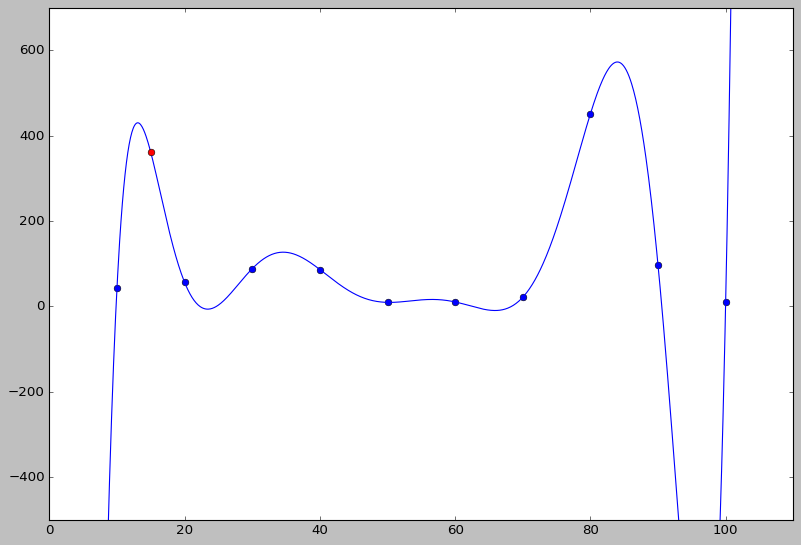

In [8]:
def divided_difference(x, y):
    """Calculate the divided difference for a given X and Y value"""
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (
                x[i + j] - x[i]
            )
    return coef


def newton_poly(a, x_data, x):
    """Determine the newton polynomial function"""
    n = len(x_data) - 1
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k]) * p
    return p


# Define the X and Y set
X = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
Y = np.array([42, 56, 88, 86, 9, 10, 21, 451, 96, 11])

# Define the coefficient arrays
a = divided_difference(X, Y)[0, :]

# Plot the polynomial graph
x_ = np.arange(0, 110, .1)
y_ = newton_poly(a, X, x_)
plt.figure(figsize = (12, 8))
plt.axis([0, 110, -500, 700])
plt.plot(X, Y, 'bo')
plt.plot(x_, y_)
plt.plot(15, newton_poly(a, X, [15]), 'ro')

# Print L(15)
print(newton_poly(a, X, [15]))

Here, we can see the Newton polynomial graphed with the datapoints. Additionally, you can see the value of $L(15)$ which is $360.63020325$